# Usage example in Google Colab

In [5]:
import json
from pathlib import Path
from typing import List

import chromadb
from IPython import display
from PIL import Image

# from models import Stella_Embedder

## Initialize Text Embedder

In [3]:
# I leave all the default values in the constructor
stella_embedder: Stella_Embedder = Stella_Embedder()

## Initialize ChromaDB

In [6]:
# Initialize the client
client = chromadb.PersistentClient(path="chromadb")

# Create or get a collection for text and/or image embeddings
collection = client.get_or_create_collection(
    # l2 is the default
    name="my_collection", metadata={"hnsw:space": "cosine"})

## Create and save the embeddings in Chroma

In [5]:
queries: List[str] = ["What is the most famous brand in digital workflow?"]
queries_embedding_tensor = stella_embedder.embed_queries(queries)
# Convert to list for the search in Chroma
queries_embedding_list = queries_embedding_tensor.tolist()

In [45]:
Image.open(Path("/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_EU_15_CLI_LAB_Executive_Summary_/page_2/image_0.jpg")).size
Image.open(Path("/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_EU_15_CLI_LAB_Executive_Summary_/page_2/image_2.jpg")).size

(1286, 247)

In [47]:
# discards images smaller than 160x160

for p in list(Path("/home/smonaco/keystone/20290925_Digital_Workflow/").glob('**/*.jpg')):
    img = Image.open(p)
    if img.size[0] < 160 or img.size[1] < 160:
        p.unlink()

In [46]:
import numpy as np
from tqdm import tqdm


small = 0
for idx in tqdm(collection.get(where={"type": "image"})["ids"]):
    result = collection.get(idx)
    image = Image.open(result["metadatas"][0]["image_path"])
    if (np.array(image.size) < 160).any():
        small += 1
        # remove from collection
        collection.delete(idx)
    

100%|██████████| 2748/2748 [00:10<00:00, 259.54it/s]


## Perform search and retrieval

In [6]:
# Perform the search in the vector db
text_results = collection.query(query_embeddings=queries_embedding_list[0], n_results=3, where={"type": "text"})
image_results = collection.query(query_embeddings=queries_embedding_list[0], n_results=3, where={"type": "image"})
page_results = collection.query(query_embeddings=queries_embedding_list[0], n_results=3, where={"type": "page"})
all_results = collection.query(query_embeddings=queries_embedding_list[0], n_results=3)

{'document': 'OMNI_DIGITAL_SPA_19_CLI_.pdf',
 'document_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_SPA_19_CLI_.pdf',
 'image_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_SPA_19_CLI_/page_40/image_0.jpg',
 'index': 0,
 'page': 40,
 'page_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_SPA_19_CLI_/page_40.jpg',
 'type': 'image'}


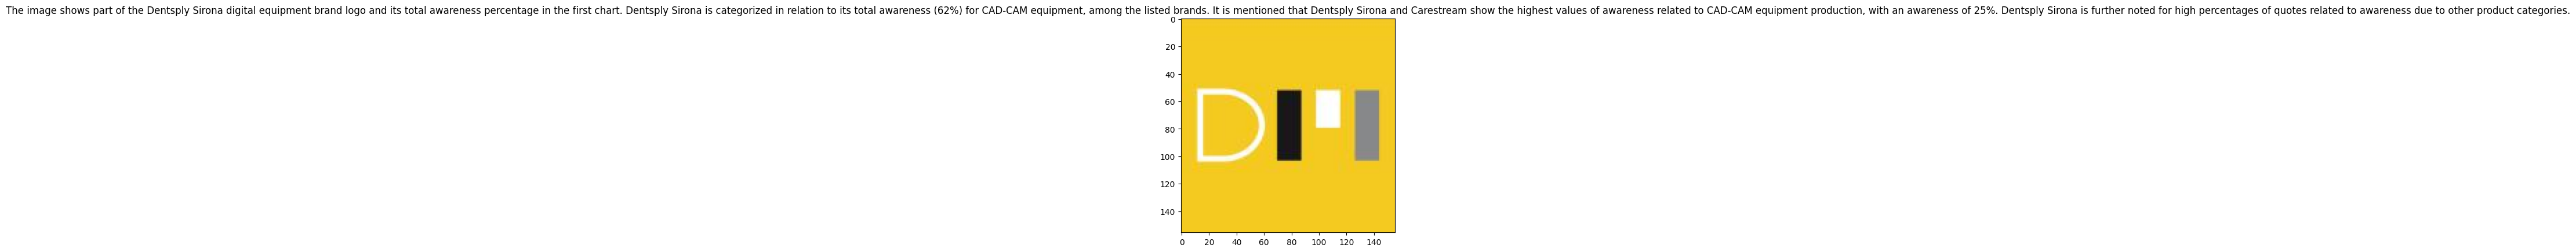

{'document': 'OMNI_DIGITAL_SPA_19_CLI_LAB_INTEGRATED_spagnolo.pdf',
 'document_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_SPA_19_CLI_LAB_INTEGRATED_spagnolo.pdf',
 'image_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_SPA_19_CLI_LAB_INTEGRATED_spagnolo/page_39/image_3.jpg',
 'index': 3,
 'page': 39,
 'page_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_SPA_19_CLI_LAB_INTEGRATED_spagnolo/page_39.jpg',
 'type': 'image'}


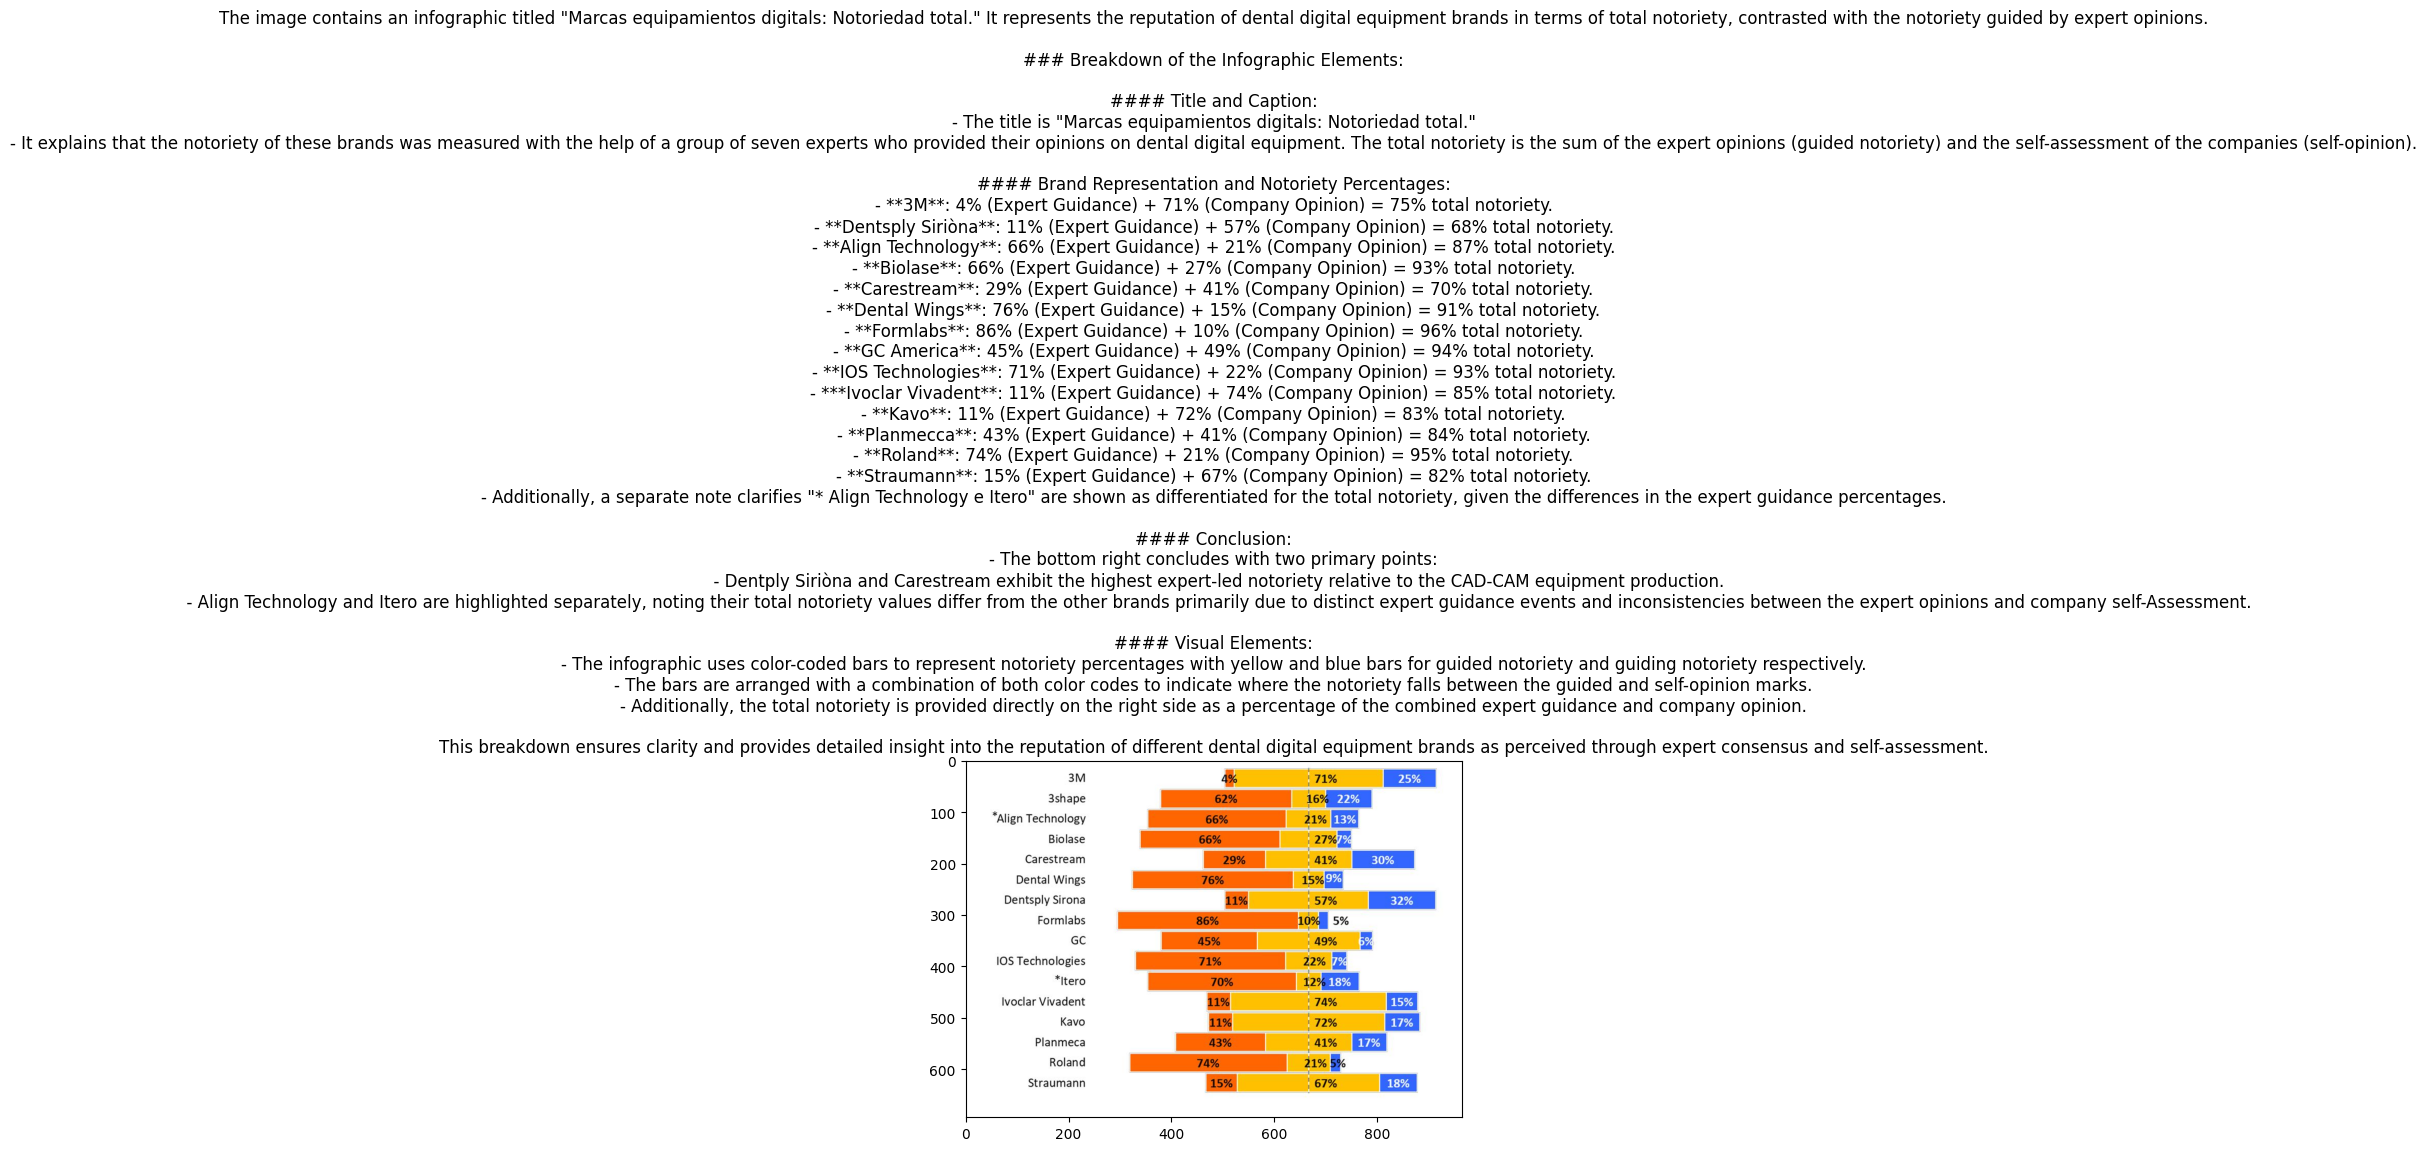

{'document': 'OMNI_DIGITAL_ITA_19_CLI_LAB_INTEGRATED_.pdf',
 'document_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_ITA_19_CLI_LAB_INTEGRATED_.pdf',
 'image_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_ITA_19_CLI_LAB_INTEGRATED_/page_36/image_4.jpg',
 'index': 4,
 'page': 36,
 'page_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_ITA_19_CLI_LAB_INTEGRATED_/page_36.jpg',
 'type': 'image'}


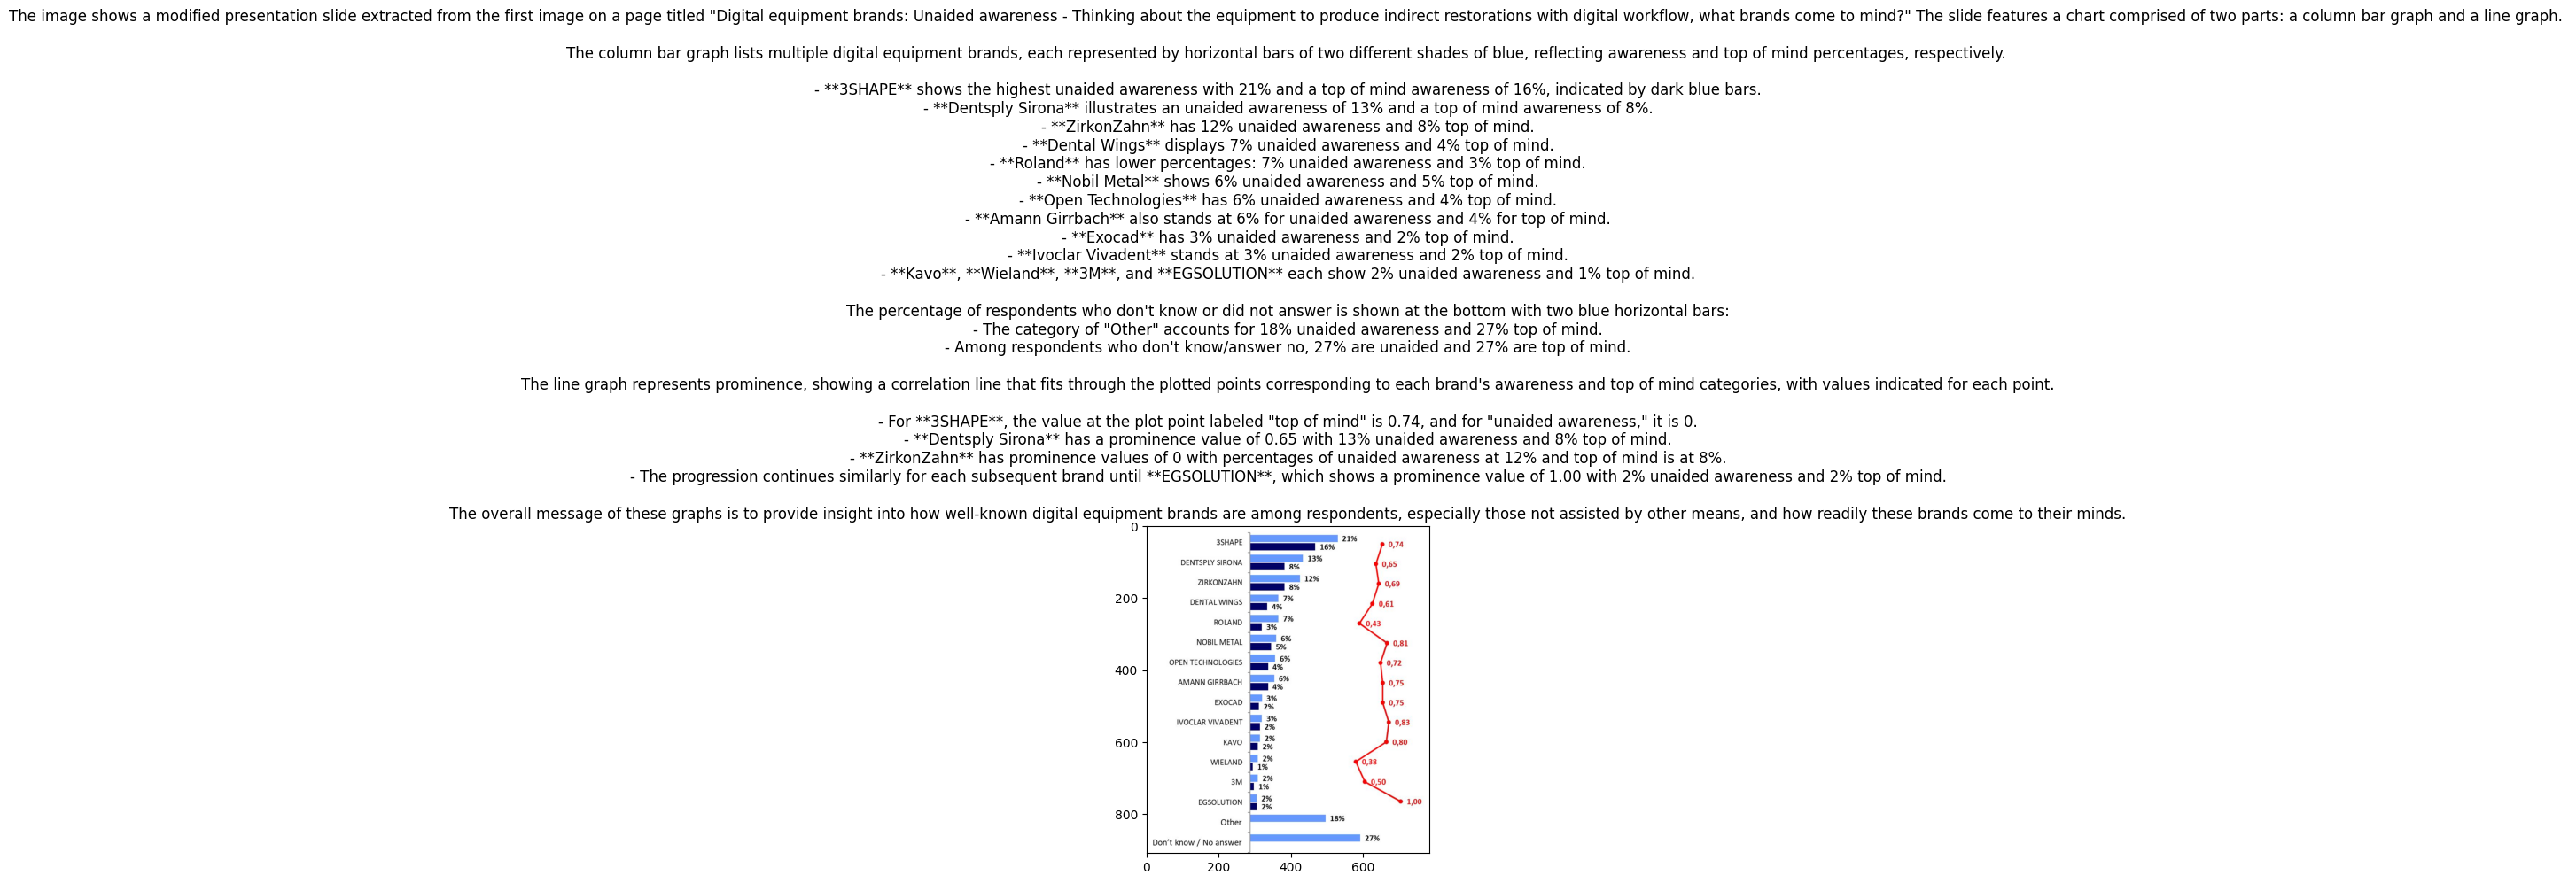

In [21]:
# Show the image results as images
from pprint import pprint
import matplotlib.pyplot as plt


for i in range(len(image_results["metadatas"][0])):
    image = Image.open(image_results["metadatas"][0][i]["image_path"])
    plt.imshow(image)
    plt.title(image_results["documents"][0][i])
    pprint(image_results["metadatas"][0][i])
    plt.show()
    # pprint(result['documents'])

In [62]:
# for each eleent of type image, store the image size in pixels to the metadata in chromadb
from tqdm import tqdm


for idx in tqdm(collection.get(where={"type": "image"})['ids']):
    result = collection.get(idx)
    break
    image_path = result["metadatas"][0]["image_path"]
    image = Image.open(image_path)
    image_size = image.size
    result["metadatas"][0]["image_l"] = image_size[0]
    result["metadatas"][0]["image_h"] = image_size[1]
    result.pop('data')
    result.pop('included')
    collection.update(**result)

  0%|          | 0/5084 [00:00<?, ?it/s]


## Get image descriptions

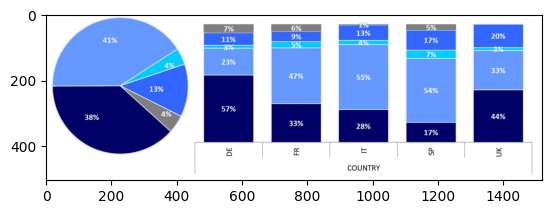

{'document': 'OMNI_DIGITAL_EU_15_CLI_LAB_Executive_Summary_.pdf',
 'document_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_EU_15_CLI_LAB_Executive_Summary_.pdf',
 'image_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_EU_15_CLI_LAB_Executive_Summary_/page_11/image_1.jpg',
 'index': 1,
 'page': 11,
 'page_path': '/home/smonaco/keystone/20290925_Digital_Workflow/OMNI_DIGITAL_EU_15_CLI_LAB_Executive_Summary_/page_11.jpg',
 'type': 'image'}


The image contains a pie chart and a series of bar graphs. Below, each element is described in detail.

### Pie Chart Description
The pie chart is labeled "Stance versus digital technologies," depicting the level of acceptance of digital technologies in dental offices. The chart is divided into segments representing different responses, along with their corresponding percentages:

- **38%**: The largest segment is marked as "I feel uncomfortable and rather far from them," indicating that nearly 40% of respondents feel uneasy with digital technologies in dental offices.
- **41%**: This is the next largest segment, marked "I am getting closer to them because I think they are the future of prosthesis," indicating that a significant portion of respondents recognize the importance of these technologies and are moving towards using them.
- **4%**: The smallest segment represents people who are using digital technologies and are comfortable with them.
- **13%**: Another notable segment, representing those using digital technologies but feeling uncomfortable.

The chart highlights a prevailing reluctance to embrace digital technologies among some respondents, balanced by a significant contingent that is increasingly accepting of them due to their perceived future importance in prosthetics.

### Bar Graphs
Below the pie chart, there are six vertical bar graphs corresponding to different countries, each divided into these four responses:

1. **Germany (DE)**:
   - 57% feel uncomfortable.
   - 23% are closer to using them because they are the future of prostheses.
   - 4% feel comfortable.
   - 13% reported using them but feeling uncomfortable.
   
2. **France (FR)**:
   - 47% feel uncomfortable.
   - 9% are getting closer because they see them as the future.
   - 4% feel comfortable.
   - 6% are using them but uncomfortable.
   - 6% feel completely comfortable but are using them.

3. **Italy (IT)**:
   - 55% feel uncomfortable.
   - 13% feel comfortable.
   - 4% are getting closer due to the future of prosthetics.
   - 28% reported using them but feeling uncomfortable.
   
4. **Spain (SP)**:
   - 54% feel uncomfortable.
   - 17% are getting closer due to the future value in prostheses.
   - 3% feel comfortable.
   - 0% reported getting closer for use but feeling uncomfortable.

5. **United Kingdom (UK)**:
   - 44% feel uncomfortable.
   - 4% are getting closer because they think they are future tools.
   - 5% feel comfortable.
   - 17% said they were using them but feeling uncomfortable.
   - 41% reported feeling uncomfortable overall, but there is no segment showing the percentage of those more comfortable.

The bar graphs align and extend the information from the pie chart to provide insights into the acceptance levels in specific countries. Overall, there is a prominent trend among dental practices, with a majority of respondents in all countries expressing discomfort with digital technologies, although some are either getting familiar with them or using them as perceived as a future necessity in dental practices.

In [63]:
# Show the page results as images
import matplotlib.pyplot as plt
import random
from pprint import pprint
from IPython.display import Markdown, display


random.seed(42)
idxs = collection.get(where={"type": "image"})["ids"]
# permute the indexes
random.shuffle(idxs)
for idx in idxs:
    description = collection.get(idx)["documents"][0]
    metadata = collection.get(idx)["metadatas"][0]
    plt.imshow(image)
    plt.show()
    pprint(metadata)
    display(Markdown(description))
    image = Image.open(metadata["image_path"])
    break

In [7]:
client = chromadb.PersistentClient(path="chromadb")

collection = client.get_or_create_collection(
    # l2 is the default
    name="my_collection", metadata={"hnsw:space": "cosine"})

In [ ]:
image_descriptions = collection.get(where = {"type": "image"})["documents"]
ids = collection.get(where = {"type": "image"})["ids"]
[id.split("__page_") for id in ids]